In [1]:
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

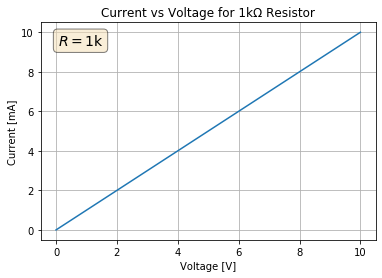

In [3]:
""" Plot V-I relationship for a 1kohm resistor"""
R = 1e3
C = 1e-6
V = np.linspace(0, 10, num=100, endpoint=True) # linear sweep of voltage
I = V/R

fig, ax = plt.subplots()
ax.plot(V, 1e3*I)
ax.set_ylabel('Current [mA]')
ax.set_xlabel('Voltage [V]')
ax.set_title('Current vs Voltage for 1k\u03A9 Resistor')
ax.grid()
textstr = r'$R=%.0f$k' % (R/1e3, )
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize =14,
            verticalalignment='top', bbox=props)
plt.show();

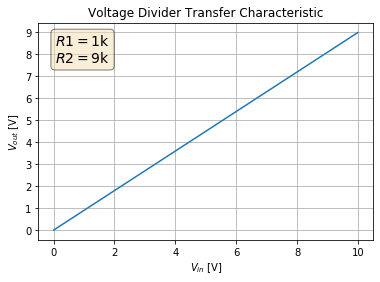

In [4]:
""" Voltage divider transfer function"""
R1 = 1e3
R2 = 9e3
Vin = np.linspace(0, 10, num=100, endpoint=True) # linear sweep of voltage
Vout = Vin*R2/(R1+R2)

fig, ax = plt.subplots()
ax.plot(Vin, Vout)
ax.set_ylabel('$V_{out}$ [V]')
ax.set_yticks(np.arange(0, 10, step=1))
ax.set_xlabel('$V_{in}$ [V]')
ax.set_title('Voltage Divider Transfer Characteristic')
ax.grid()
textstr = '\n'.join((
    r'$R1=%.0f$k' % (R1/1e3, ),
    r'$R2=%.0f$k' % (R2/1e3, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize =14,
            verticalalignment='top', bbox=props)
plt.show();

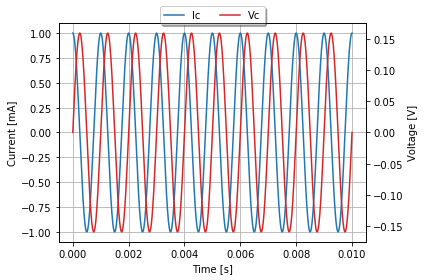

In [5]:
"""Capacitor voltage-current relationship"""

# Create a sinusoidal current and simulate capacitor voltage 
t = np.linspace(0, 10e-3, num=1000, endpoint=True) 
f = 1e3 
w = 2*math.pi*f                                    
isin = 1e-3*np.cos(w*t)                            
Yc = signal.TransferFunction([1], [1E-6, 0])        
tout, vsin, x = signal.lsim(Yc, isin, t, X0=0, interp=1)  

# Plot the input and output with separate y axes
fig, ax1 = plt.subplots()
lns1 = ax1.plot(t, 1e3*isin, color='tab:blue', label='Ic')
ax2 = ax1.twinx()
lns2 = ax2.plot(tout, vsin, color='tab:red', label='Vc')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center', ncol=2, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1) )
ax1.set_ylabel('Current [mA]')
ax1.set_xlabel('Time [s]')
ax1.grid()
ax2.set_ylabel('Voltage [V]')
plt.tight_layout()
plt.show();

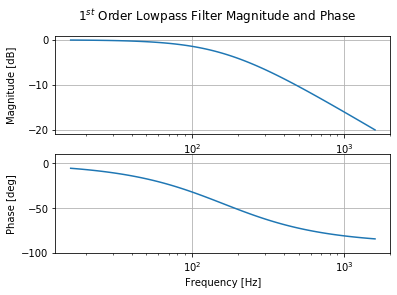

In [6]:
""" Simple RC Filters """
R = 1e3
C = 1e-6
tau = R*C

""" Lowpass filter frequency response"""
filt_lp = signal.TransferFunction([1], [tau, 1])
w, mag, phase = filt_lp.bode()       # rad/s, dB, degrees 
f = w/2/np.pi        

# Plot the frequency response
fig, axs = plt.subplots(2)
fig.suptitle('$1^{st}$ Order Lowpass Filter Magnitude and Phase')
axs[0].semilogx(f, mag)
axs[0].grid()
axs[0].set_ylabel('Magnitude [dB]')
axs[1].semilogx(f,phase)
axs[1].grid()
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylim(-100, 10)
fig.align_ylabels(axs[:])
plt.show();

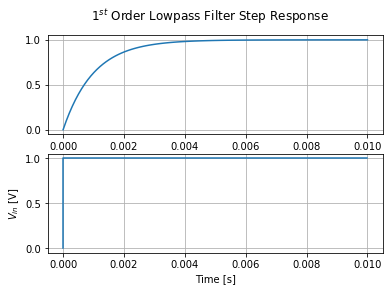

In [7]:
""" Lowpass filter step response """
tin = np.linspace(0,10e-3,100)
u_step = np.concatenate( (0, np.ones(99)), axis=None)
tout,vout = signal.step(filt_lp, X0=None, T=tin)

# Plot the simulation result
fig, axs = plt.subplots(2)
fig.suptitle('$1^{st}$ Order Lowpass Filter Step Response')
axs[0].plot(tout, vout)
axs[1].set_ylabel('$V_{out}$ [V]')
axs[0].grid()
axs[1].step(tin, u_step)
axs[1].set_ylabel('$V_{in}$ [V]')
axs[1].set_xlabel('Time [s]')
axs[1].grid()
plt.show();

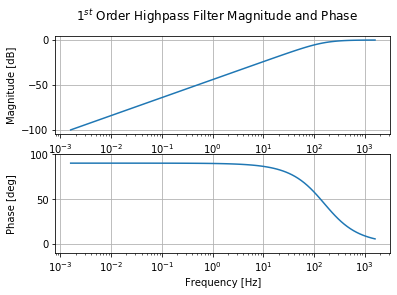

In [8]:
""" Highpass filter frequency response """
filt_hp = signal.TransferFunction([tau, 0], [tau, 1])
w, mag, phase = filt_hp.bode()      # rad/s, dB, degrees
f = w/2/np.pi

# Plot the frequency response
fig, axs = plt.subplots(2)
fig.suptitle('$1^{st}$ Order Highpass Filter Magnitude and Phase')
axs[0].semilogx(f, mag)
axs[0].grid()
axs[0].set_ylabel('Magnitude [dB]')
axs[1].semilogx(f,phase)
axs[1].grid()
axs[1].set_ylabel('Phase [deg]')
axs[1].set_xlabel('Frequency [Hz]')
axs[1].set_ylim(-10, 100)
fig.align_ylabels(axs[:])
plt.show();

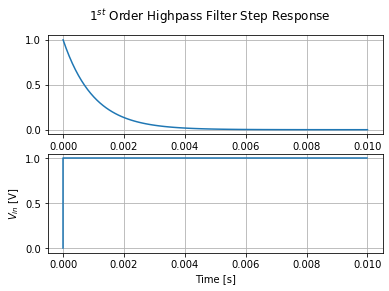

In [9]:
""" Highpass filter step response """
tin = np.linspace(0,10e-3,100)
u_step = np.concatenate( (0, np.ones(99)), axis=None)
tout,vout = signal.step(filt_hp, X0=None, T=tin)

# Plot the simulation result
fig, axs = plt.subplots(2)
fig.suptitle('$1^{st}$ Order Highpass Filter Step Response')
axs[0].plot(tout, vout)
axs[1].set_ylabel('$V_{out}$ [V]')
axs[0].grid()
axs[1].step(tin, u_step)
axs[1].set_ylabel('$V_{in}$ [V]')
axs[1].set_xlabel('Time [s]')
axs[1].grid()
plt.show();

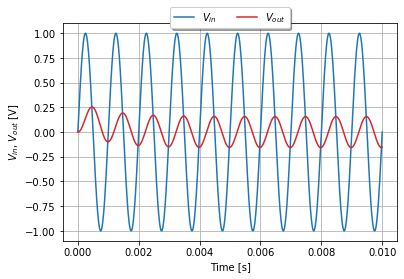

In [10]:
""" FFT of input/output for a LP filter """
f = 1e3
w = 2*math.pi*f
t_sim = 10e-3              # length of simulation in seconds
n_sim = 1000               # number of simulation time points
t_in = np.linspace(0, t_sim, n_sim, endpoint=True) # array of time points
v_in = np.sin(w*t_in)      # sinusoidal "voltage"

# Response of LP filter to sinusoidal input
t_out, v_out, x = signal.lsim(filt_lp, v_in, t_in, X0=None, interp=None)

# Plot the input and output in the time domain
fig, ax = plt.subplots()
lns1 = ax.plot(t_in, v_in, color='tab:blue', label='$V_{in}$')
lns2 = ax.plot(t_out, v_out, color='tab:red', label='$V_{out}$')
ax.grid()
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', ncol=2, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1) )
ax.set_ylabel('$V_{in}$, $V_{out}$ [V]')
ax.set_xlabel('Time [s]')
plt.show();

/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


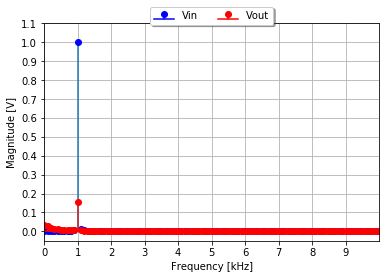

In [11]:
# Compute FFT of input and output 
dt = t_sim/n_sim  # time step
fft_v_in = np.fft.rfft(v_in) * 2 / len(v_in) # single-sided FFT
fft_mag_in = np.abs(fft_v_in)                # FFT magnitude
fft_freq = np.fft.rfftfreq(len(v_out), dt)

fft_v_out = np.fft.rfft(v_out) * 2 / len(v_out) # single-sided FFT
fft_mag_out = np.abs(fft_v_out)                 # FFT magnitude

# Plot the FFT magnitudes using stem
fig, ax = plt.subplots()
stem1 = ax.stem(1e-3*fft_freq, fft_mag_in, linefmt='tab:blue', markerfmt='bo', basefmt='b', label='$V_{in}$')
stem2 = ax.stem(1e-3*fft_freq, fft_mag_out, linefmt='tab:red', markerfmt='ro', basefmt='r', label='$V_{out}$')
stem1.set_label('Vin')
stem2.set_label('Vout')
ax.legend(loc='upper center', ncol=2, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 10, step=1))
ax.set_yticks(np.arange(0, 1.2, step=.1))
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Magnitude [V]')
ax.grid()
plt.show();

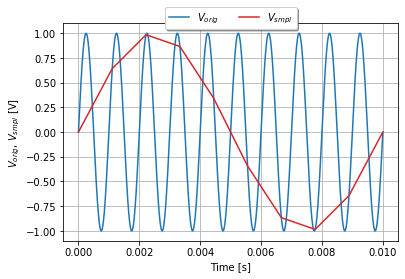

In [12]:
""" FFT of a sampled signal with aliasing """
f = 1e3
w = 2*math.pi*f
t_sig = 10e-3          # exactly 10 periods
n_orig = 1000          # "continuous time" version
n_smpl = 10            # undersampled by a factor of 2
t_orig = np.linspace(0, t_sig, n_orig, endpoint=True)
t_smpl = np.linspace(0, t_sig, n_smpl, endpoint=True)
v_orig = np.sin(w*t_orig)
v_smpl = np.sin(w*t_smpl)

# Plot both signals in the time domain
fig, ax = plt.subplots()
lns1 = ax.plot(t_orig, v_orig, color='tab:blue', label='$V_{orig}$')
lns2 = ax.plot(t_smpl, v_smpl, color='tab:red', label='$V_{smpl}$')
ax.grid()
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', ncol=2, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1) )         
ax.set_ylabel('$V_{orig}$, $V_{smpl}$ [V]')
ax.set_xlabel('Time [s]')
plt.show();

/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/home/kegedy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


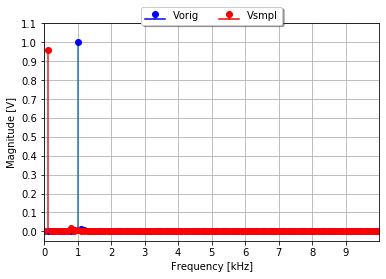

In [13]:
# FFT of original and sampled signals
dt = t_sig/n_orig
fft_v_orig = np.fft.rfft(v_orig) * 2 / len(v_orig)
fft_mag_orig = np.abs(fft_v_orig)
fft_freq = np.fft.rfftfreq(len(v_orig), dt)

# Interpolate the undersampled signal 
v_smpl_interp = np.interp(t_orig, t_smpl, v_smpl, period=100)
fft_v_smpl = np.fft.rfft(v_smpl_interp) * 2 / len(v_smpl_interp)
fft_mag_smpl = np.abs(fft_v_smpl)
fft_freq2 = np.fft.rfftfreq(len(v_smpl_interp), dt)

# Plot FFTs using stem
fig, ax = plt.subplots()
stem1 = ax.stem(1e-3*fft_freq, fft_mag_orig, linefmt='tab:blue', markerfmt='bo', basefmt='b', label='$V_{orig}$')
stem2 = ax.stem(1e-3*fft_freq2, fft_mag_smpl, linefmt='tab:red', markerfmt='ro', basefmt='r', label='$V_{smpl}$')
stem1.set_label('Vorig')
stem2.set_label('Vsmpl')
ax.legend(loc='upper center', ncol=2, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 10, step=1))
ax.set_yticks(np.arange(0, 1.2, step=.1))
ax.set_xlabel('Frequency [kHz]')
ax.set_ylabel('Magnitude [V]')
ax.grid()
plt.show();